In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
# global parameters

N = 1000     # number of sites
q = 2        # number of states per site

In [208]:
# energy function of the potts model.
def energy(sigma, J):
    # initialize energy to 0
    en = 0
    # loop over sites
    for i in range(N):
        # interaction mask of site i: True at position j iff site i and site j interact.
        delta = (sigma[i] == sigma)
        delta[i] = False
        # energy due to interaction of i with all other sites --> double counting non-diagonal entries
        en += np.dot(J[i], delta)

    # fix double counting before returning
    return 0.5 * en / N

In [209]:
# slow but safe implementation of the energy
def energy_test(sigma, J):
    # initialize energy to 0
    en = 0
    # loop over pairs of sites
    for i in range(N):
        for j in range(i + 1, N):
            # add interaction of sites i and j
            if sigma[i] == sigma[j]:
                en += J[i, j]
    return en / N

In [210]:
# propose a random flip in a random site
def propose_flip(sigma, J):
    # sample a random site and state
    index = np.random.randint(0, N)
    x = np.random.randint(0, q)
    # ensure new state is different than the old one
    while x == sigma[index]:
        x = np.random.randint(0, q)
    # return
    return index, x

In [211]:
# compute change in energy after flipping site i to state new_q
def delta_energy(sigma, J, i, new_q):

    # interaction masks of site i before and after flip
    delta_old = (sigma == sigma[i])
    delta_new = (sigma == new_q)
    delta_new[i], delta_old[i] = False, False

    # energy due to interactions that stop happening after flip
    en_old = np.dot(J[i], delta_old)
    # energy due to interactions that begin happening after flip
    en_new = (np.dot(J[i], delta_new))

    # return change in energy due to flip
    return (en_new - en_old) / N

In [212]:
# # test delta_energy
#
# ind = np.random.randint(N)
# new_q = np.random.randint(q)
#
# old_en = energy_test(sigma, J)
# delta_en = delta_energy(sigma, J, ind, new_q)
#
# sigma[ind] = new_q
# new_en = energy_test(sigma, J)
#
# print(new_en - old_en, delta_en)

In [213]:
# metropolis acceptance with symmetric proposal. returns a Boolean
def metropolis(delta_en, t):
    if delta_en < 0:
        return True
    if np.random.uniform(0, 1) < np.exp( - delta_en / t ):
        return True
    return False

In [214]:
# # random symmetric interaction matrix.
# J = np.random.randn(N, N)
# for i in range(N):
#     for j in range(i+1, N):
#         J[i, j] = J[j, i]

# ferromagnetic interaction
J = - np.ones((N, N))

In [236]:
# Monte Carlo simulation

# random initial configuration
sigma = np.random.randint(0, q, N)

t = 0.3
nstep = 100000
stride = 1000

en = energy(sigma, J)
en_history = []
mag_history = np.zeros((q, nstep))
prob_history = []
n_accepted = 0

for istep in range(nstep):

    # propose random flip
    ind, q_new = propose_flip(sigma, J)
    # compute energy difference
    delta_en = delta_energy(sigma, J, ind, q_new)

    # update probability history
    if delta_en > 0:
        prob_history.append(min(1, np.exp(- delta_en / t)))

    # metropolis update rule
    if metropolis(delta_en, t):
        # update state
        sigma[ind] = q_new
        n_accepted += 1

        # update energy
        en += delta_en

    # update history
    en_history.append(en)
    mag_history[:, istep] = np.bincount(sigma)

    if istep % stride == 0:
        print(istep, en)

0 -249.51600000000002
1000 -252.41599999999988
2000 -267.9959999999998
3000 -324.0289999999998
4000 -368.52499999999986
5000 -403.1639999999998
6000 -422.55599999999987
7000 -443.98099999999994
8000 -447.5249999999999
9000 -451.1009999999999
10000 -450.2039999999999
11000 -462.02099999999984
12000 -458.3489999999999
13000 -459.2639999999999
14000 -460.18099999999987
15000 -452.9009999999999
16000 -464.7959999999999
17000 -455.6159999999999
18000 -460.18099999999987
19000 -468.52399999999983
20000 -460.18099999999987
21000 -445.7489999999999
22000 -446.6359999999999
23000 -450.2039999999999
24000 -449.3089999999999
25000 -446.6359999999999
26000 -455.6159999999999
27000 -452.9009999999999
28000 -458.3489999999999
29000 -457.43599999999986
30000 -455.6159999999999
31000 -456.52499999999986
32000 -459.2639999999999
33000 -455.6159999999999
34000 -456.52499999999986
35000 -451.9999999999999
36000 -445.7489999999999
37000 -443.09999999999997
38000 -445.7489999999999
39000 -446.6359999999999

Text(0, 0.5, 'E')

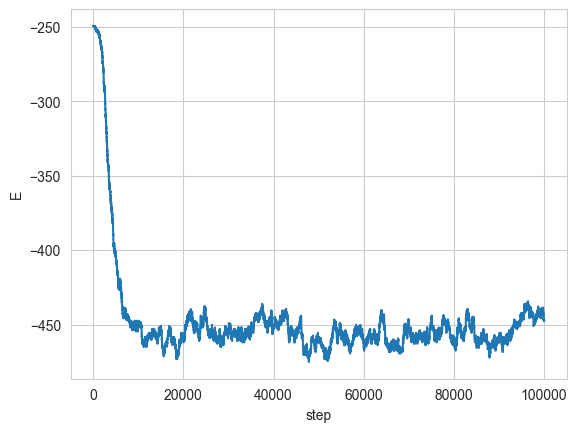

In [237]:
plt.plot(en_history)
plt.xlabel("step")
plt.ylabel("E")

Fraction of accepted proposals: 0.11524


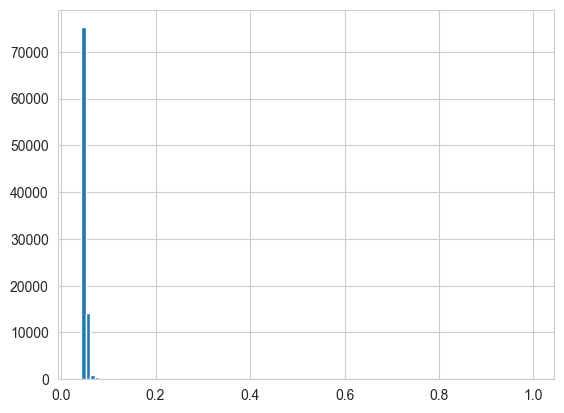

In [238]:
print(f"Fraction of accepted proposals: {n_accepted / nstep}")
plt.hist(prob_history, bins=100)
plt.show()

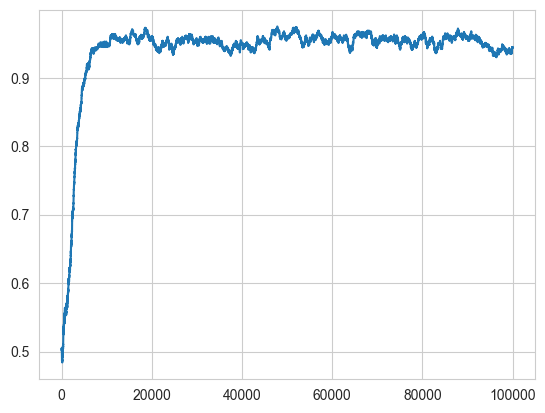

In [239]:
plt.plot(mag_history[0] / N)
plt.show()